# KERAS MNIST TO SUMMARY HANDRIGHT DIGITS

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import numpy
np.random.seed(1337)  # for reproducibility
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'boston_housing',
 'cifar',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

DATASET MNIST OF IMAGES WITH 28X28 PIXELS

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
[len(X_train), len(y_train)]

[60000, 60000]

In [5]:
[len(X_test), len(y_test)]

[10000, 10000]

RESHAPE EACH DATA IN A VECTOR OF 28*28=784 

What is a pixel?

A digital photo is not one non-dividable thing. If you zoom in far enough you’ll see that your image is like a mosaic formed by small tiles, which in photography are called pixels

Pixel count

The first kind of resolution refers to the pixel count which is the number of pixels that form your photo. In order to calculate this resolution you just use the same formula you would use for the area of any rectangle; multiply the length by the height. For example, if you have a photo that has 4,500 pixels on the horizontal side, and 3,000 on the vertical size it gives you a total of 13,500,000. Because this number is very unpractical to use, you can just divide it by a million to convert it into megapixels. So 13,500,000 / 1,000000 = 13.5 Megapixels.

Pixel density

The other kind of resolution is about how you distribute the total amount of pixels that you have, which is commonly referred as pixel density.

Now, the resolution is expressed in dpi (or ppi), which is the acronym for dots (or pixels) per inch. So, if you see 72 dpi it means that the image will have 72 pixels per inch; if you see 300 dpi means 300 pixels per inch, and so on.

The final size of your image depends on the resolution that you choose. If an image is 4500 x 3000 pixels it means that it will print at 15 x 10 inches if you set the resolution to 300 dpi, but it will be 62.5 x 41.6 inches at 72 dpi. While the size of your print does change, you are not resizing your photo (image file), you are just reorganizing the existing pixels.

Imagine a rubber band, you can stretch it or shrink it but you’re not changing the composition of the band, you’re not adding or cutting any of the rubber.

So quantity equals quality?

Because of the aforementioned correlation between size and resolution, a lot of people think that megapixels equal quality. And in a sense it does because the more pixels you have to spread out, the higher the pixel density will be.

However, on top of the quantity you should also consider the depth of the pixels, this is what determines the amount of tonal values that your image will have. In other words it is the number of colors per pixel. For example, a 2-bit depth can store only black, white and two shades of grey, but the more common value is 8-bit. The values grows exponentially so for example with an 8-bit photo (2 to the power of 8 = 256) you’ll have 256 tones of green, 256 tones of blue, and 256 tones of red, which means about 16 million colors.

This is already more that the eye can distinguish which means that 16-bit or 32-bit will look relatively similar to us. Of course, this means that your image will be heavier even of the size is the same, because there is more information contained in each pixel. This is also why quality and quantity are not necessarily the same.

Therefore quantity helps, but also the size and depth of each pixel determine the quality. This is why you should look all the specs of the camera and its sensor and not just the amount of Megapixels. After all, there’s a limit to the size you can print or view your image, more than that it will only result in extra file size (megabytes) and no impact in the image size (megapixels) or the quality.

How to choose and control image size and file size?

First of all, you need to choose the outlet for your photo, there is a maximum density that you need. If you are going to post your image online you can do great with only 72 dpi, but that is too little for printing a photo. If you are going to print it you need between 300 and 350 dpi.

Of course, we are talking about generalizations because each monitor and each printer will have slightly different resolutions as well. For example, if you want to print your photo to 8×10 inches you need your image to have 300dpi x 8″ = 2400 pixels by 300dpi x 10″ = 3000 pixels (so 2400×3000 to print an 8×10 at 300dpi). Anything bigger than that will only be taking up space on your hard drive.

How to resize in Photoshop

Open the menu for the image size and in the popup window, you need to tick the Resample Image box. If you don’t activate “resample” you will only be redistributing the pixels like I explained at the beginning of the article.

You can also choose to tick the Constrain Proportion if you want the measure to adjust according to the changes you make. So the width adjusts when you change the height and vice versa.


In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

NORMALIZE POR 2^8=256 

In [7]:
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


LABELS FROM CATEGORICAL TO NUMERICAL VALUES

In [0]:
# convert class vectors to binary class matrices
nb_classes=10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [0]:
#MODEL ARCHITECTURE
nhidden=128
dropout=0.25
lr =0.0002

MODEL

In [0]:
model = Sequential()
model.add(Dense(nhidden, input_shape=(784,), activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(nhidden, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(nb_classes,activation='softmax'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Loss Function

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr),
              metrics=['accuracy'])


TRAINING

In [0]:
epochs = 20
BATCH_SIZE = 128

In [14]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, nb_epoch=epochs,verbose=1, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.9276 - accuracy: 0.7208 - val_loss: 0.3299 - val_accuracy: 0.9118
Epoch 2/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.3956 - accuracy: 0.8839 - val_loss: 0.2404 - val_accuracy: 0.9333
Epoch 3/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.3086 - accuracy: 0.9103 - val_loss: 0.2001 - val_accuracy: 0.9435
Epoch 4/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.2603 - accuracy: 0.9242 - val_loss: 0.1758 - val_accuracy: 0.9505
Epoch 5/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.2295 - accuracy: 0.9333 - val_loss: 0.1572 - val_accuracy: 0.9550
Epoch 6/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.2068 - accuracy: 0.9394 - val_loss: 0.1446 - val_accuracy: 0.9584
Epoch 7/20
48000/48000 [==============================] - 2s 38us/st

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


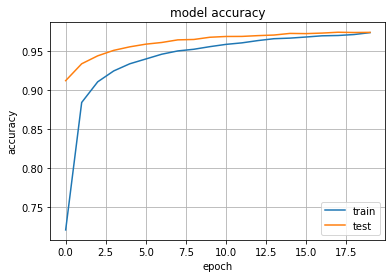

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.grid(True)
plt.show()

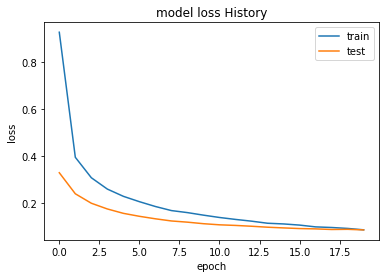

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

MODEL EVALUATION

Scaled score from 1-7 is described as a weakness or below average with a corresponding percentile rank of 1-16. Scaled score from 8-12 is described as average with a corresponding percentile rank of 25-75

If a candidate scores in the 90th percentile, they have scored higher than 90% of the norm group, putting them in the top 10%. If a candidate scores in the 10th percentile, they have scored higher than 10% of the norm group, putting them in the bottom 10%. ... 

This is what a percentile score does for us.

In [18]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0]*100)
print('Test accuracy:', score[1]*100)

10000/10000 [==============================] - 0s 24us/step
Test score: 8.220066705811767
Test accuracy: 97.49000072479248


MODEL PREDICTION

In [0]:
pred = model.predict_classes(X_test,batch_size=BATCH_SIZE)

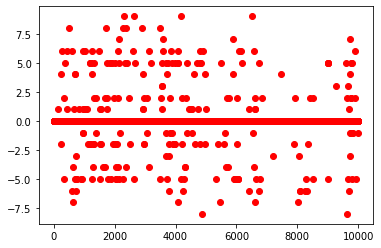

In [20]:
ytest=[np.argmax(Y_test[i,:]) for i in range(10000)]
ydiff=ytest-pred

plt.plot(ydiff,'or')
plt.show()

In [21]:
sum(np.sign(np.abs(ydiff)))

251